In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("Covid19_Prediction - ClassifactionBasedSpecies.csv")
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(500)

,Nucleus,Exosome,Ribosome,Membrane,Endoplasmic Reticulum,Cytosol,Species
0,0.999,1.0,0.659,0.818,0.273,0.0,Human coronavirus 229E
1,0.999,1.0,0.656,0.818,0.274,0.0,Human coronavirus 229E
2,0.999,1.0,0.654,0.829,0.258,0.0,Human coronavirus 229E
3,0.998,1.0,0.644,0.814,0.265,0.0,Human coronavirus 229E
4,0.999,1.0,0.659,0.826,0.254,0.0,Human coronavirus 229E
...,...,...,...,...,...,...,...
495,0.978,1.0,0.000,0.761,0.000,0.0,SARS Cov2
496,0.978,1.0,0.000,0.761,0.000,0.0,SARS Cov2
497,0.977,1.0,0.000,0.760,0.000,0.0,SARS Cov2
498,0.977,1.0,0.000,0.760,0.000,0.0,SARS Cov2


In [ ]:
df.count()

Nucleus                  502
Exosome                  502
Ribosome                 502
Membrane                 502
Endoplasmic Reticulum    502
Cytosol                  502
Species                  502
dtype: int64

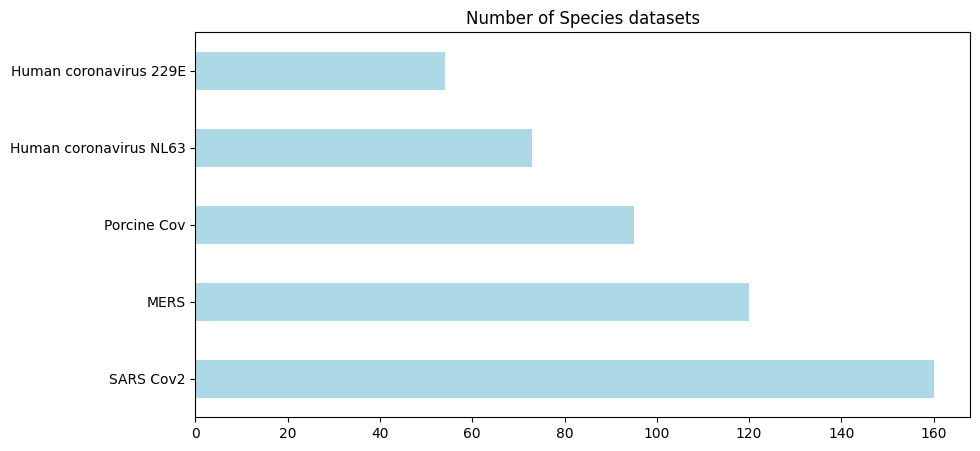

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df.Species.value_counts().plot(kind = 'barh', color = 'lightblue', figsize = (10,5))
plt.title ("Number of Species datasets");

In [ ]:
features = df.drop('Species',axis='columns')
target = df.Species

In [ ]:
features.head()

,Nucleus,Exosome,Ribosome,Membrane,Endoplasmic Reticulum,Cytosol
0,0.999,1.0,0.659,0.818,0.273,0.0
1,0.999,1.0,0.656,0.818,0.274,0.0
2,0.999,1.0,0.654,0.829,0.258,0.0
3,0.998,1.0,0.644,0.814,0.265,0.0
4,0.999,1.0,0.659,0.826,0.254,0.0


In [ ]:
target.head()

0    Human coronavirus 229E
1    Human coronavirus 229E
2    Human coronavirus 229E
3    Human coronavirus 229E
4    Human coronavirus 229E
Name: Species, dtype: object

<ipython-input-32-305bbd61f1b8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


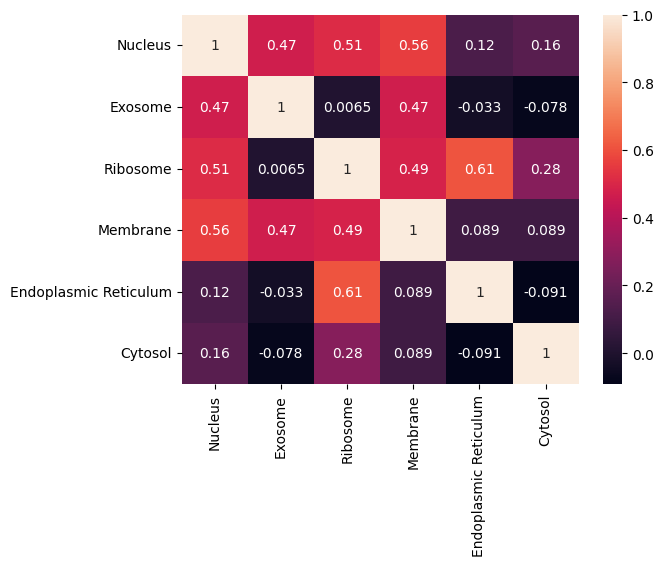

In [ ]:
import seaborn as sn


corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.33)

In [ ]:
print("X train data count :\n", X_train.count())

X train data count :
 Nucleus                  336
Exosome                  336
Ribosome                 336
Membrane                 336
Endoplasmic Reticulum    336
Cytosol                  336
dtype: int64


In [ ]:
print("Y test data count :\n", y_test.count())

Y test data count :
 166


In [ ]:
X_test.head()

,Nucleus,Exosome,Ribosome,Membrane,Endoplasmic Reticulum,Cytosol
452,0.977,1.0,0.000,0.760,0.000,0.000
240,0.993,1.0,0.419,0.749,0.228,0.000
430,0.977,1.0,0.000,0.759,0.000,0.000
169,0.991,1.0,0.421,0.741,0.000,0.227
229,0.996,1.0,0.553,0.756,0.295,0.117


##Naive Bayes Classification & Prediction

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()

In [ ]:
NB_model.fit(X_train, y_train)
NB_pred = NB_model.predict(X_test)

In [ ]:
display(NB_pred)

array(['Porcine Cov', 'Human coronavirus NL63', 'Porcine Cov', 'MERS',
       'MERS', 'Porcine Cov', 'MERS', 'Human coronavirus NL63',
       'Human coronavirus NL63', 'Porcine Cov', 'Porcine Cov', 'MERS',
       'MERS', 'Human coronavirus NL63', 'Porcine Cov',
       'Human coronavirus NL63', 'Porcine Cov', 'MERS',
       'Human coronavirus NL63', 'SARS Cov2', 'MERS', 'Porcine Cov',
       'Porcine Cov', 'Porcine Cov', 'Porcine Cov', 'Porcine Cov',
       'Porcine Cov', 'MERS', 'Porcine Cov', 'Human coronavirus NL63',
       'MERS', 'Porcine Cov', 'Porcine Cov', 'Porcine Cov', 'MERS',
       'MERS', 'Porcine Cov', 'Porcine Cov', 'Human coronavirus NL63',
       'Human coronavirus NL63', 'Porcine Cov', 'Human coronavirus NL63',
       'Porcine Cov', 'Human coronavirus NL63', 'Porcine Cov',
       'Porcine Cov', 'Porcine Cov', 'Human coronavirus NL63',
       'Porcine Cov', 'Porcine Cov', 'Human coronavirus NL63', 'MERS',
       'Porcine Cov', 'Human coronavirus NL63', 'Porcine Cov',
  

In [ ]:
NB_df=pd.DataFrame(NB_pred)
display(NB_df)

,0
0,Porcine Cov
1,Human coronavirus NL63
2,Porcine Cov
3,MERS
4,MERS
...,...
161,Human coronavirus 229E
162,MERS
163,MERS
164,MERS


In [ ]:
print('Accuracy of Naive Bayes classifier on training set: {:.3f}'
     .format(NB_model.score(X_train, y_train)))
print('Accuracy of Naive Bayes classifier on test set: {:.3f}'
     .format(NB_model.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on training set: 0.628
Accuracy of Naive Bayes classifier on test set: 0.693


In [ ]:
NB_model.predict([[0.999,1,0.729,0.845,0.442,0.0]])
#Human coronvirus NL63

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Human coronavirus NL63'], dtype='<U22')

In [ ]:
NB_model.predict([[0.996,1.000,0.616,0.7520,0.436,0.126]])
#SARS Cov2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['MERS'], dtype='<U22')

In [ ]:
NB_model.predict([[0.999,1,0.720,0.840,0.450,0.0]])
#Human coronvirus NL63

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Human coronavirus NL63'], dtype='<U22')

In [ ]:
NB_model.predict([[0.973,1,0.000,0.746,0.226,0.0]])
#PorcineVirus

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Porcine Cov'], dtype='<U22')

##**Prediction** and Classification using KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)
KNN_pred = knn.predict(X_test)

In [ ]:
knn.score(X_train,y_train)

0.9553571428571429

In [ ]:
print('Accuracy of KNN classifier on training set: {:.3f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.3f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.955
Accuracy of KNN classifier on test set: 0.952


In [ ]:
KNN_df = pd.DataFrame(KNN_pred)

In [ ]:
display(KNN_df)

,0
0,SARS Cov2
1,MERS
2,SARS Cov2
3,MERS
4,MERS
...,...
161,Human coronavirus 229E
162,MERS
163,MERS
164,MERS


In [ ]:
import pickle
pickle.dump(NB_model,open('./model.sav', 'wb'))
pickle.load(open('model.sav', 'rb'))

GaussianNB()